In [509]:
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import numpy as np

import datetime
from datetime import datetime

import pandas as pd
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import  make_scorer, accuracy_score, roc_auc_score, mean_squared_error
from sklearn.model_selection import train_test_split, cross_validate, RandomizedSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression


import warnings
warnings.filterwarnings('ignore')

In [510]:
df = pd.read_csv('marketing_campaign.csv', sep='\t')

In [511]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [512]:
print(f'Total: {len(df)}')
print(f'Shape: {df.shape}')

Total: 2240
Shape: (2240, 29)


In [513]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [514]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


<AxesSubplot:ylabel='Density'>

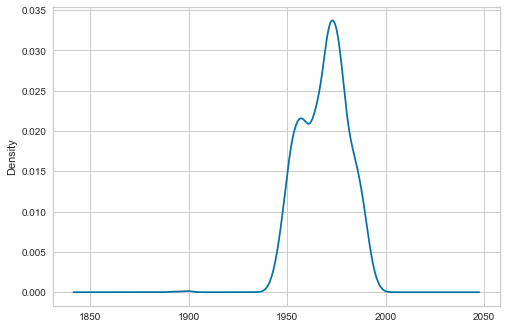

In [515]:
df['Year_Birth'].plot(kind='kde')

In [516]:
df['Age'] = 2014 - df['Year_Birth'] 
df = df.drop(['Year_Birth'], axis=1)

<AxesSubplot:ylabel='Density'>

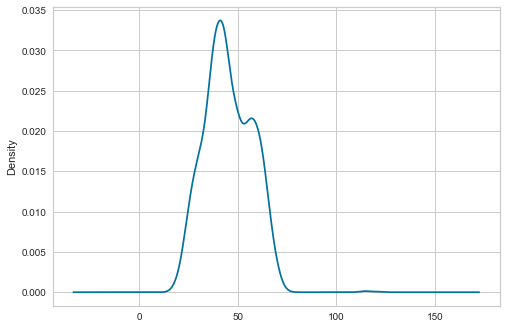

In [517]:
df['Age'].plot(kind='kde')

In [518]:
df['Education'].value_counts()


Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [519]:
df['Education'] = df['Education'].map({'Basic': 1, 'Graduation': 2, 'Master':3,'2n Cycle':4, 'Master':4, 'PhD':5})

In [520]:
df['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [521]:
# df.loc[df['Marital_Status'] == 'Alone','Marital_Status'] = 'Single'
# df.loc[df['Marital_Status'] == 'Absurd','Marital_Status'] = 'Single'
# df.loc[df['Marital_Status'] == 'YOLO','Marital_Status'] = 'Single'

In [522]:
df['Living_With'] = df['Marital_Status'].replace({'Married':2, 'Together':2, 'Single':1, 'Divorced':1,'Widow':1, 'Absurd':1, 'YOLO':1, 'Alone':1})

df['Children'] = df[["Kidhome", "Teenhome"]].sum(axis=1)
df['Family_Size'] = df[["Living_With", "Children"]].sum(axis=1)

In [523]:
df['Living_With'].value_counts()

2    1444
1     796
Name: Living_With, dtype: int64

In [524]:
df['Family_Size'].value_counts()

3    889
2    764
4    301
1    254
5     32
Name: Family_Size, dtype: int64

In [525]:
df['with_kids'] = np.where((df['Teenhome'] > 0) | (df['Kidhome'] > 0), 1, 0)


In [526]:
df.head()

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Living_With,Children,Family_Size,with_kids
0,5524,2,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,57,1,0,1,0
1,2174,2,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,60,1,2,3,1
2,4141,2,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,49,2,0,2,0
3,6182,2,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,30,2,1,3,1
4,5324,5,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,33,2,1,3,1


In [527]:
format_str = '%d-%m-%Y'
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format=format_str)

In [528]:
date_str = '2014-06-29'
format_str = '%Y-%m-%d'
max_date = datetime.strptime(date_str, format_str)


def get_days(x):
    return x.days

df['date_enrollment'] = (max_date - df['Dt_Customer']).apply(get_days)


In [529]:
df['Spent']=df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

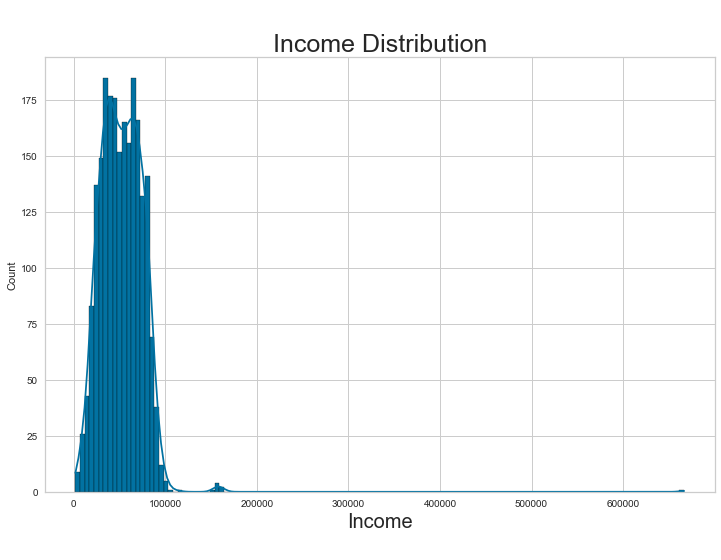

In [530]:
fig,ax=plt.subplots(figsize=(12,8))

sns.histplot(df['Income'], kde=True, bins='auto', alpha=1, fill=True)
ax.set_title('\nIncome Distribution', fontsize=25)
ax.set_xlabel('Income\n', fontsize=20)
plt.show()

In [531]:
df.loc[df['Income'] > 200000,'Income'] = 200000

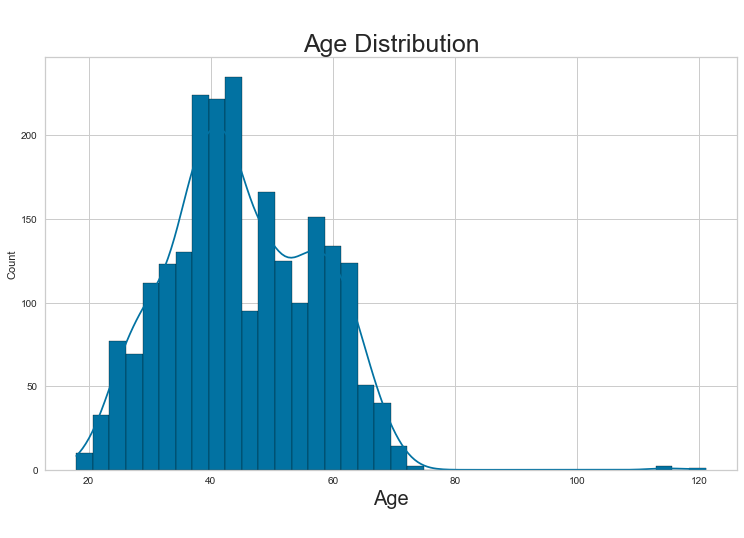

In [532]:
fig,ax=plt.subplots(figsize=(12,8))
plt.tight_layout(pad=6.0)

sns.histplot(df['Age'], kde=True, bins='auto', alpha=1, fill=True)
ax.set_title('\nAge Distribution', fontsize=25)
ax.set_xlabel('Age\n', fontsize=20)
plt.show()

In [533]:
df['Age'].describe()

count    2240.000000
mean       45.194196
std        11.984069
min        18.000000
25%        37.000000
50%        44.000000
75%        55.000000
max       121.000000
Name: Age, dtype: float64

In [534]:
df.loc[df['Age'] > 80,'Age'] = 80

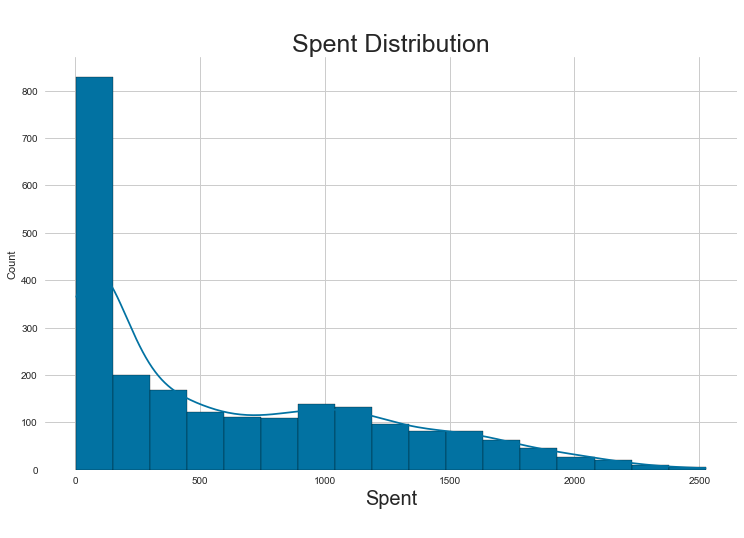

In [535]:
# Plotting Spent attribute in Histogram 

fig,ax=plt.subplots(figsize=(12,8))
plt.tight_layout(pad=6.0)

sns.histplot(df['Spent'], kde=True, bins='auto', alpha=1, fill=True)
ax.set_title('\nSpent Distribution', fontsize=25)
ax.set_xlabel('Spent\n', fontsize=20)

sns.despine(left=True, bottom=True)
plt.show()

([<matplotlib.axis.XTick at 0x197e9933760>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

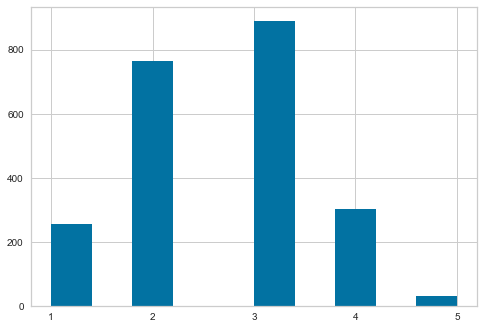

In [536]:
plt.hist(df['Family_Size'], bins=10) 
plt.xticks(range(min(df['Family_Size']), max(df['Family_Size'])+1, 1))

In [537]:
pd.set_option('display.max_columns', None)
df.head()

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Living_With,Children,Family_Size,with_kids,date_enrollment,Spent
0,5524,2,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,57,1,0,1,0,663,1617
1,2174,2,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,60,1,2,3,1,113,27
2,4141,2,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,49,2,0,2,0,312,776
3,6182,2,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,30,2,1,3,1,139,53
4,5324,5,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,33,2,1,3,1,161,422


In [538]:
df = df.drop(['Dt_Customer','ID','Dt_Customer','Marital_Status',"Z_CostContact","Z_Revenue","Z_CostContact","Z_Revenue", "Living_With","Kidhome","Teenhome"], axis=1)

In [539]:
print(df.columns.tolist())

['Education', 'Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Age', 'Children', 'Family_Size', 'with_kids', 'date_enrollment', 'Spent']


In [540]:
df = df.dropna().reset_index(drop=True)

In [554]:
df

,Education,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Children,Family_Size,with_kids,date_enrollment,Spent,cluster
0,2,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,57,0,1,0,663,1617,1
1,2,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,60,2,3,1,113,27,0
2,2,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,49,0,2,0,312,776,1
3,2,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,30,1,3,1,139,53,0
4,5,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,33,1,3,1,161,422,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,2,61223.0,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0,47,1,3,1,381,1341,2
2212,5,64014.0,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0,68,3,5,1,19,444,2
2213,2,56981.0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0,33,0,1,0,155,1241,1
2214,4,69245.0,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0,58,1,3,1,156,843,2


In [555]:
def plot_logistic_regression(df1:pd.DataFrame):

    normalized_df=(df1-df1.min())/(df1.max()-df1.min())

    X = normalized_df.drop("Response", axis=1)
    y = normalized_df["Response"]

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

    model = LogisticRegression()
    model.fit(X_train, y_train)
    model.score(X_test, y_test)
    coefficients = model.coef_
    avg_importance = np.mean(np.abs(coefficients), axis=0)
    y_pred = model.predict(X_test)
    get_scores(model_2, X_test, y_test)
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    get_plot(avg_importance, X_train)

Accuracy: 0.872
ROC_AUC: 0.624
MSE: 0.128
Accuracy: 0.8808664259927798


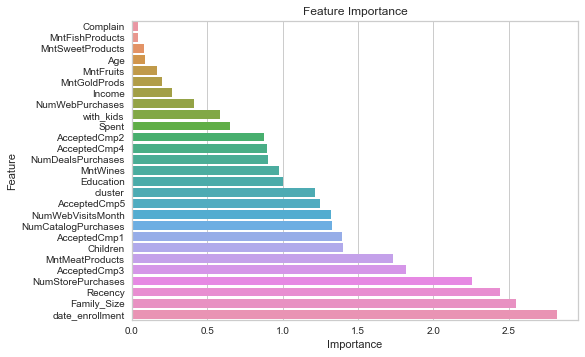

In [556]:
plot_logistic_regression(df)

In [543]:
scaler=StandardScaler()
scaled_features = scaler.fit_transform(df.values)
scaled_data = pd.DataFrame(scaled_features, index=df.index, columns=df.columns)

In [544]:
pca = PCA(n_components=4)
data_pca = pca.fit_transform(scaled_data)

In [545]:
data_pca.shape

(2216, 4)

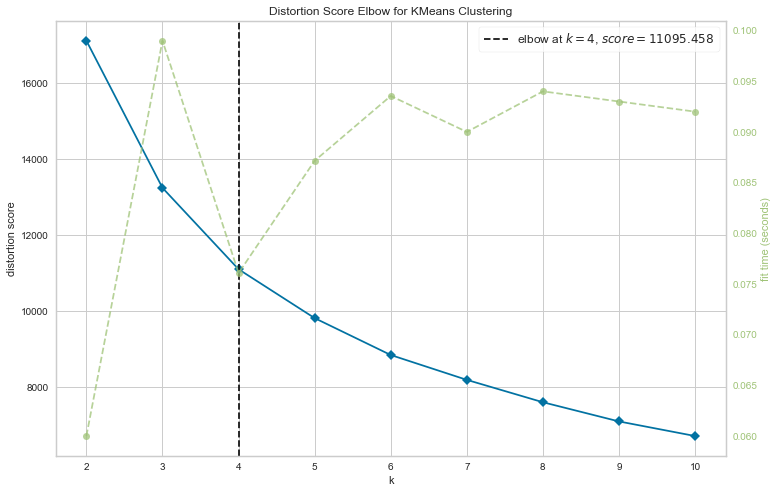

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [546]:
plt.figure(figsize=(12, 8))
elbow_graph = KElbowVisualizer(KMeans(random_state=123), k=10)
elbow_graph.fit(data_pca)
elbow_graph.show()

In [547]:
kmeans = KMeans(n_clusters =4 )
cluster = kmeans.fit_predict(data_pca)

In [548]:
df['cluster']=cluster

Text(0.5, 1.0, 'clusters in data')

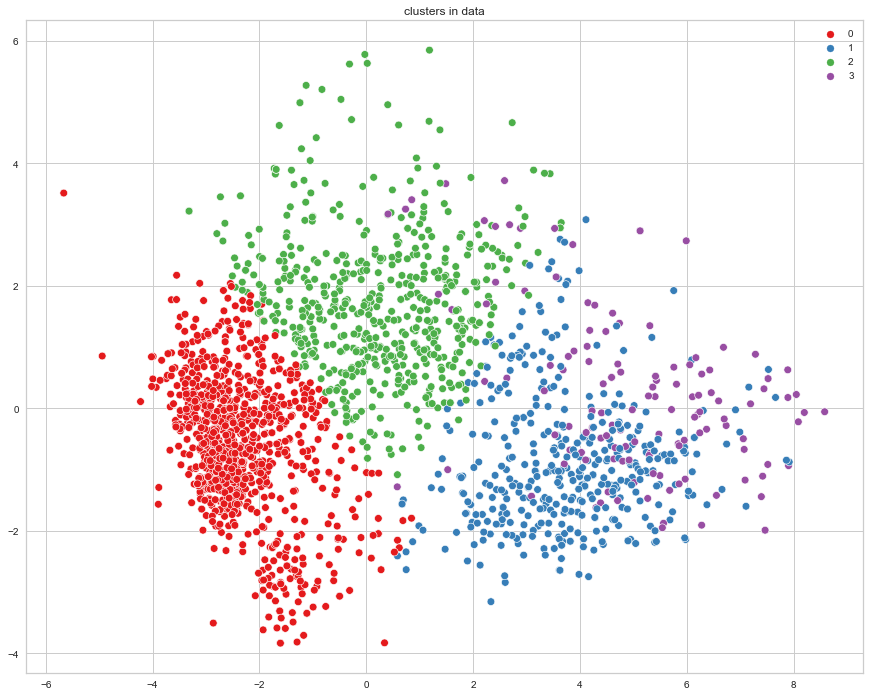

In [549]:
#ploting cluster...
plt.figure(figsize=(15,12))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=cluster,s=60, palette='Set1')
plt.title('clusters in data')

In [550]:
df

,Education,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Children,Family_Size,with_kids,date_enrollment,Spent,cluster
0,2,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,57,0,1,0,663,1617,1
1,2,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,60,2,3,1,113,27,0
2,2,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,49,0,2,0,312,776,1
3,2,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,30,1,3,1,139,53,0
4,5,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,33,1,3,1,161,422,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,2,61223.0,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0,47,1,3,1,381,1341,2
2212,5,64014.0,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0,68,3,5,1,19,444,2
2213,2,56981.0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0,33,0,1,0,155,1241,1
2214,4,69245.0,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0,58,1,3,1,156,843,2


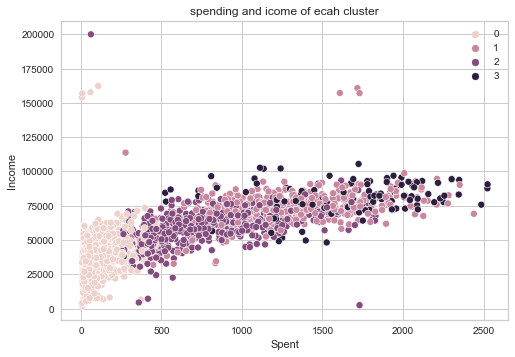

In [551]:
pl = sns.scatterplot(data = df, x=df["Spent"], y=df["Income"], hue=df["cluster"])
pl.set_title("spending and icome of ecah cluster")
plt.legend()
plt.show()